In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.model_selection as cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
training_data = pd.read_csv('adult_dataset_training.csv')
test_data = pd.read_csv('adult_dataset_test.csv')

In [4]:
train_no_income = training_data.drop('income', axis = 1)

In [5]:
combined_dataset = pd.concat([train_no_income, test_data])

In [7]:
%matplotlib inline

In [8]:
combined_dataset.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
#Fucntion to encode the categorical data
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [10]:
#Encode categorical data like marital status, occupation and relationship as integers
encoded_data, encoders = number_encode_features(combined_dataset)

In [11]:
encoded_data.head()

age  workclass  fnlwgt  education  educational-num  marital-status  \
0   74          6  119129         11                9               2   
1   56          4   98809          5                4               2   
2   17          2  182070          1                7               4   
3   45          4  175262          6                5               2   
4   30          4  224462          1                7               2   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0          12             0     4       1             0          2149   
1           7             5     4       0          5013             0   
2           8             3     4       0             0             0   
3           6             0     1       1             0             0   
4          14             0     4       1             0             0   

   hours-per-week  native-country  
0              20              39  
1              45              39  
2              16              39  
3              40              19  
4              50              39

In [34]:
combined_dataset.head()

age         workclass  fnlwgt education  educational-num  \
0   74  Self-emp-not-inc  119129   HS-grad                9   
1   56           Private   98809   7th-8th                4   
2   17         Local-gov  182070      11th                7   
3   45           Private  175262       9th                5   
4   30           Private  224462      11th                7   

       marital-status         occupation relationship                race  \
0  Married-civ-spouse              Sales      Husband               White   
1  Married-civ-spouse  Machine-op-inspct         Wife               White   
2       Never-married      Other-service    Own-child               White   
3  Married-civ-spouse  Handlers-cleaners      Husband  Asian-Pac-Islander   
4  Married-civ-spouse   Transport-moving      Husband               White   

   gender  capital-gain  capital-loss  hours-per-week native-country  
0    Male             0          2149              20  United-States  
1  Female          5013             0              45  United-States  
2  Female             0             0              16  United-States  
3    Male             0             0              40          India  
4    Male             0             0              50  United-States

In [12]:
correlational_matrix = encoded_data.corr()

In [14]:
print(correlational_matrix)

                      age  workclass    fnlwgt  education  educational-num  \
age              1.000000   0.017526 -0.076628  -0.015058         0.030940   
workclass        0.017526   1.000000 -0.016546   0.017187         0.055918   
fnlwgt          -0.076628  -0.016546  1.000000  -0.022570        -0.038761   
education       -0.015058   0.017187 -0.022570   1.000000         0.359668   
educational-num  0.030940   0.055918 -0.038761   0.359668         1.000000   
marital-status  -0.263978  -0.068441  0.029851  -0.037417        -0.069992   
occupation      -0.014259   0.260005  0.000860  -0.020972         0.112265   
relationship    -0.263383  -0.092365  0.009092  -0.010758        -0.090534   
race             0.028421   0.052932 -0.027062   0.013250         0.029239   
gender           0.088120   0.091223  0.027739  -0.027041         0.009328   
capital-gain     0.077229   0.036044 -0.003706   0.028928         0.125146   
capital-loss     0.056944   0.010880 -0.004366   0.017638       

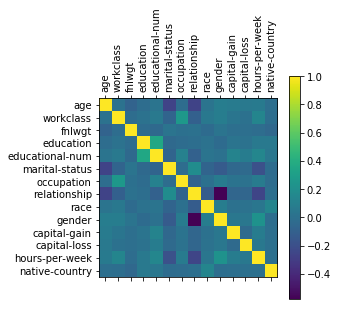

In [39]:
plt.matshow(correlational_matrix)
plt.xticks(range(correlational_matrix.shape[1]), correlational_matrix.columns, rotation = 90)
plt.yticks(range(correlational_matrix.shape[1]), correlational_matrix.columns, rotation = 0)
cb = plt.colorbar()
plt.savefig('test.jpg', bbox_inches = 'tight', dpi = 300)

In [32]:
combined_dataset['marital-status'].unique()

array(['Married-civ-spouse', 'Never-married', 'Married-spouse-absent',
       'Separated', 'Divorced', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

In [33]:
combined_dataset['relationship'].unique()

array(['Husband', 'Wife', 'Own-child', 'Unmarried', 'Not-in-family',
       'Other-relative'], dtype=object)

In [22]:
encoded_data.shape

(48842, 14)

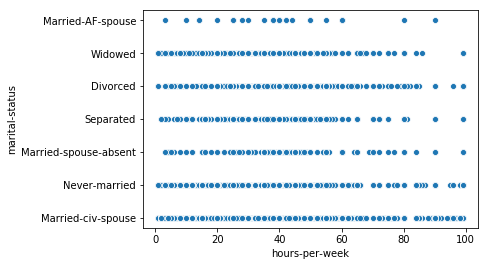

In [26]:
sns.scatterplot(combined_dataset['hours-per-week'], combined_dataset['marital-status'])

[Text(0, 0, 'Married-civ-spouse'),
 Text(0, 0, 'Never-married'),
 Text(0, 0, 'Married-spouse-absent'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Divorced'),
 Text(0, 0, 'Widowed'),
 Text(0, 0, 'Married-AF-spouse')]

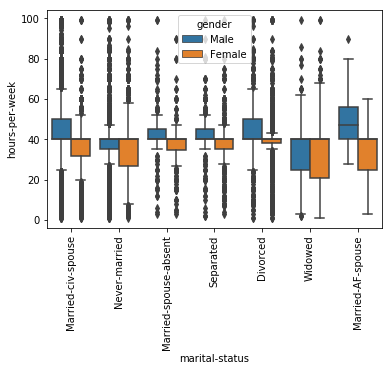

In [31]:
boxp = sns.boxplot(x='marital-status', y='hours-per-week', data=combined_dataset)
#boxp = sns.boxplot(x='marital-status', y='hours-per-week', hue = 'gender', data=combined_dataset)
boxp.set_xticklabels(boxp.get_xticklabels(), rotation = 90)

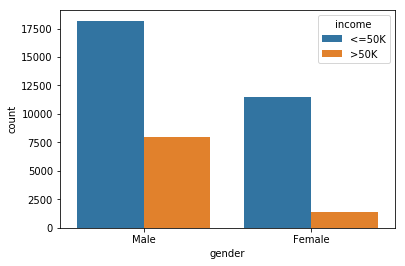

In [44]:
sns.countplot(x='gender', hue='income', data = training_data)

In [107]:
def proportion_plot(df, hue, x, file, rot=0):
    proportion = df.groupby(x)[hue].value_counts(normalize = True).rename('prop')
    proportion = pd.DataFrame(proportion)
    proportion.reset_index(inplace = True)
    prop_plot = sns.barplot(x = x, y = 'prop', hue = hue, data = proportion)
    prop_plot.set(xlabel=x, ylabel='prop', title='Proportion of {} per group: {}'.format(hue, x), ylim=(0,1))
    prop_plot.set_xticklabels(prop_plot.get_xticklabels(), rotation=rot)
    plt.savefig(fname=file + '.jpg', dpi = 300, bbox_inches = 'tight')

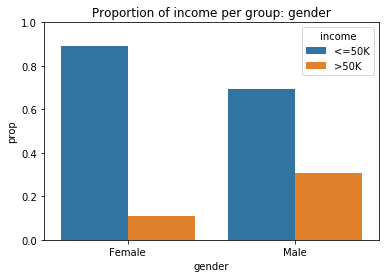

In [108]:
proportion_plot(training_data, 'income', 'gender', 'PropGenonIncome')

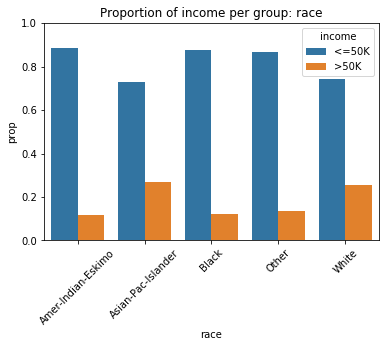

In [109]:
proportion_plot(training_data, 'income', 'race', 'PropRaceonIncome', 45)

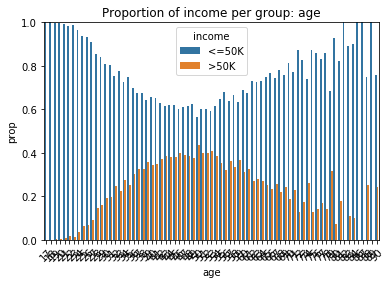

In [110]:
proportion_plot(training_data, 'income', 'age', 'PropageonIncome', 45)